# Projet interactif en manipulation de données

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from pathlib import Path

In [2]:
# Charger les données
chemin_base = Path().cwd()
chemin_bitcoin = chemin_base.parent.joinpath("data", "crypto", "bitcoin.csv")

df = pd.read_csv(chemin_bitcoin)

In [3]:
# Afficher les 5 premières lignes
print(df.head())

         Date  Open  High  Low  Close  Volume Currency
0  2010-07-18   0.0   0.1  0.1    0.1      75      USD
1  2010-07-19   0.1   0.1  0.1    0.1     574      USD
2  2010-07-20   0.1   0.1  0.1    0.1     262      USD
3  2010-07-21   0.1   0.1  0.1    0.1     575      USD
4  2010-07-22   0.1   0.1  0.1    0.1    2160      USD


In [4]:
# Utiliser la date comme index (transformation)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
# Calculer la moyenne mobile de 30 jours
df['MM30'] = df['Close'].rolling(window=30).mean()

In [6]:
# Afficher les 5 premières lignes
print(df.head())
# Afficher les 5 dernières lignes
print(df.tail())

            Open  High  Low  Close  Volume Currency  MM30
Date                                                     
2010-07-18   0.0   0.1  0.1    0.1      75      USD   NaN
2010-07-19   0.1   0.1  0.1    0.1     574      USD   NaN
2010-07-20   0.1   0.1  0.1    0.1     262      USD   NaN
2010-07-21   0.1   0.1  0.1    0.1     575      USD   NaN
2010-07-22   0.1   0.1  0.1    0.1    2160      USD   NaN
               Open     High      Low    Close  Volume Currency          MM30
Date                                                                         
2022-08-19  23201.6  23202.3  20807.8  20831.3  339472      USD  23179.950000
2022-08-20  20830.7  21357.4  20784.8  21138.9  206943      USD  23112.813333
2022-08-21  21138.9  21692.4  21077.4  21517.2  177522      USD  23074.213333
2022-08-22  21516.8  21517.4  20912.1  21416.3  251833      USD  23039.410000
2022-08-23  21416.5  21458.2  21271.2  21309.0  251695      USD  22996.973333


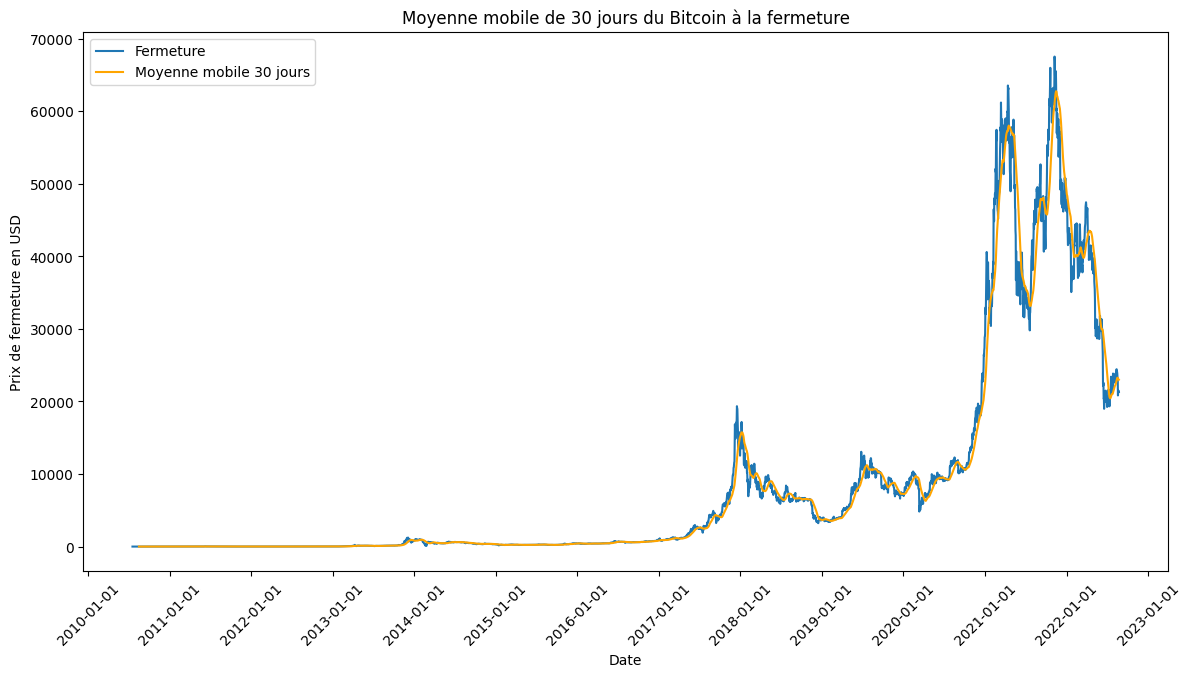

In [7]:
# Produire un graphique de la moyenne mobile de 30 jours
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Fermeture')
plt.plot(df['MM30'], label='Moyenne mobile 30 jours', color='orange')

# Paramétrer le texte de l'axe des x
localisateur = mdates.YearLocator() # Trouver les années
formatter = mdates.DateFormatter('%Y-%m-%d') # Formater les années

plt.gca().xaxis.set_major_locator(localisateur)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)


plt.xlabel('Date')
plt.ylabel('Prix de fermeture en USD')
plt.title('Moyenne mobile de 30 jours du Bitcoin à la fermeture')

plt.legend(loc='best')

In [9]:
# Sauvegarder le graphique
chemin_image = chemin_base.joinpath('graphiques', 'bitcoin_moyennemobile30j.png')
plt.savefig(chemin_image, dpi=300)

<Figure size 640x480 with 0 Axes>

# Conclusion

L'utilisation du mode scientifique permet de manipuler les données et de les visualiser en temps réel en conservant le contexte du projet au sein de l'interpréteur. On pousse l'interactivité plus loin en utilisant les Jupiter Notebooks pour exécuter le code en bloc, une cellule à la fois. Cela permet de voir les résultats intermédiaires, de corriger les lacunes et de documenter. Il est finalement possible de convertir un notebook en script Python natif pour une utilisation plus traditionnelle.